# 序言

- 在网页上处理数学公式，需要使用MathJax模块，这个模块支持三种数学公式表示语言：
    - LaTex
    - MathML
    - AsciiMath
- 从编程角度有两种方式：
    - 基于浏览器运行环境的开发；
    - 基于Node.js虚拟机环境的开发（服务器开发模式）；
        - 在Vue中使用的模式；     
- Node有存在三种开发模式：
    - 组件模式
    - 预加载模式
    - 直接调用模式
    
- 下面先解释两种开发模式，然后说明最重要的部分，配置选项；
    - 其中在Vue环境的开发，单独用一个主题来说明。

# 浏览器开发模式

## 模块下载

- 在浏览器中使用的模块，有三种方式：
    - 直接下载：
        - `https://webscripts.softpedia.com/script/Scientific-Engineering-Ruby/Mathematics/MathJax-69985.html`
        - `https://codeload.github.com/mathjax/MathJax/zip/2.6.0`
    - npm下载
        - `npm install mathjax`：浏览器使用模块；
        - `npm install mathjax-full`：Node.js使用模块；

- 在`https://webscripts.softpedia.com`下载的文件

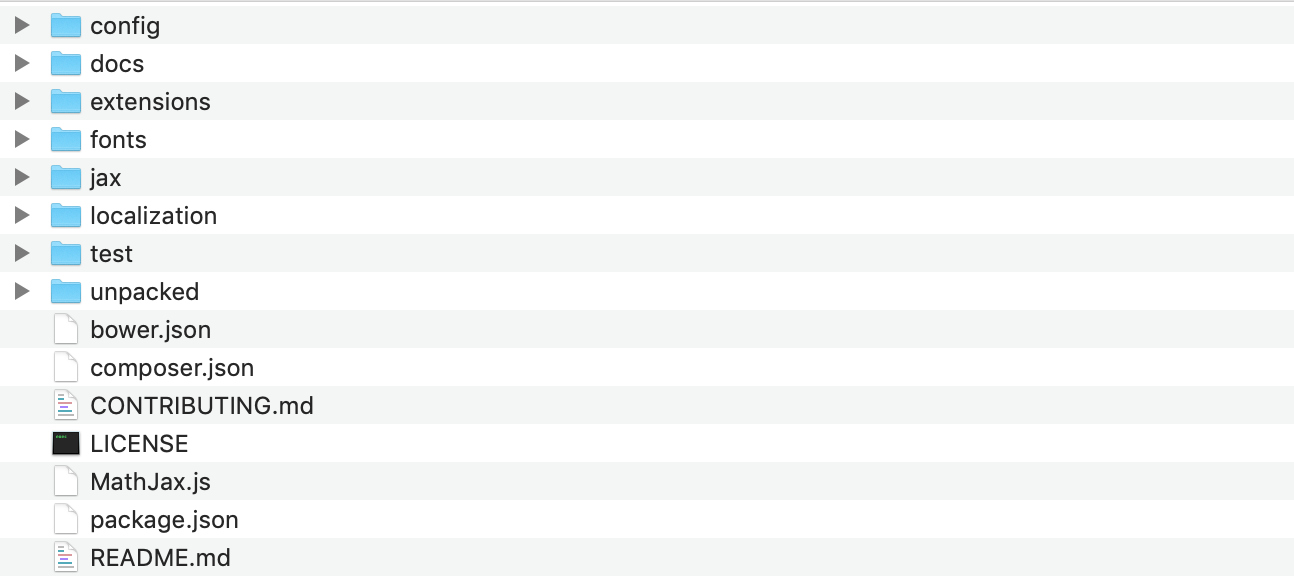

- 这里采用npm下载（本地局部下载）
    1. 创建目录
    2. 构建npm环境（package.json文件）
    3. 使用npm安装指令如下：
        - `npm install mathjax  --save`

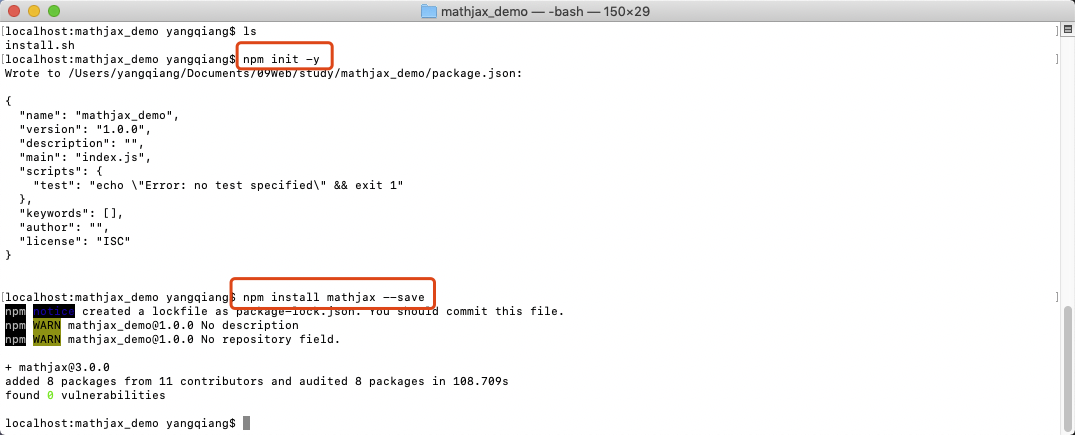

## 使用模式

### 引入模块

#### 使用网络公共资源CDN
    
```HTML

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>使用MathJax v3转换LaTex为HTML</title>
    <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-chtml.js"></script>
    ......
      
```

- 完整代码

```HTML
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>使用MathJax v3转换LaTex为HTML</title>
    <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-chtml.js"></script>
    <script>
      function convert() {
        /*例子来自官网，没有做修改*/
        // 获取输入的公式
        var input = document.getElementById("input").value.trim();
        // 获取显示组件
        var display = document.getElementById("display");
        // 转换与显示事件按钮
        var button = document.getElementById("render");
        button.disabled = display.disabled = true;
        
        // 清除公式输出组件
        output = document.getElementById('output');
        output.innerHTML = '';

        // 充值MathJax环境，MathJax是全局变量（从js脚本引入的）
        MathJax.texReset();
        
        // 获取选项（根据输出组件回去转换的参数：大小等）
        var options = MathJax.getMetricsFor(output);  
        options.display = display.checked;   //行模式与块模式

        // 转换（异步模式）
        MathJax.tex2chtmlPromise(input, options).then(function (node) {
          // 转换成功，传递渲染好以后的node对象
          output.appendChild(node); // 添加渲染的公式到输出组件
          MathJax.startup.document.clear();   // 清除文档
          MathJax.startup.document.updateDocument();  // 释放文档 
        }).catch(function (err) {
          // 转换失败的处理
          output.appendChild(  // 创建pre组件显示你错误文本
            document.createElement('pre')
          ).appendChild(
            document.createTextNode(err.message)
          );
        }).then(function () {
          // 处理完毕后处理，等价于finally
          button.disabled = display.disabled = false;
        });
      }
    </script>
    <style>
      #frame {
        max-width: 40em;
        margin: auto;
      }
      #input {
        border: 1px solid grey;
        margin: 0 0 .25em;
        width: 100%;
        font-size: 120%;
        box-sizing: border-box;
      }
      #output {
        font-size: 120%;
        margin-top: .75em;
        border: 1px solid grey;
        padding: .25em;
        min-height: 2em;
      }
      #output > pre {
        margin-left: 5px;
      }
      .left {
        float: left;
      }
      .right {
        float: right;
      }
    </style>
  </head>

  <body>
    <div id="frame">

      <h1>MathJax v3: LaTeX 转换为 HTML</h1>
      <!-- 输入组件 -->
      <textarea id="input" rows="15" cols="10">
      %
      % Enter TeX commands below
      %
      x = {-b \pm \sqrt{b^2-4ac} \over 2a}.
      y = \dfrac{1}{x} 
      </textarea>
      <br />
      <!-- 选择框架 -->
      <div class="left">
        <input type="checkbox" id="display" checked onchange="convert()"> 
        <label for="display">行模式与块模式</label>
      </div>
      <!-- 操作按钮 -->
      <div class="right">
        <input type="button" value="渲染LaTex" id="render" onclick="convert()" />
      </div>
      <br clear="all" />
      <!-- 显示组件 -->
      <div id="output">

      </div>
    </div>

  </body>

</html>

```

- 运行结果
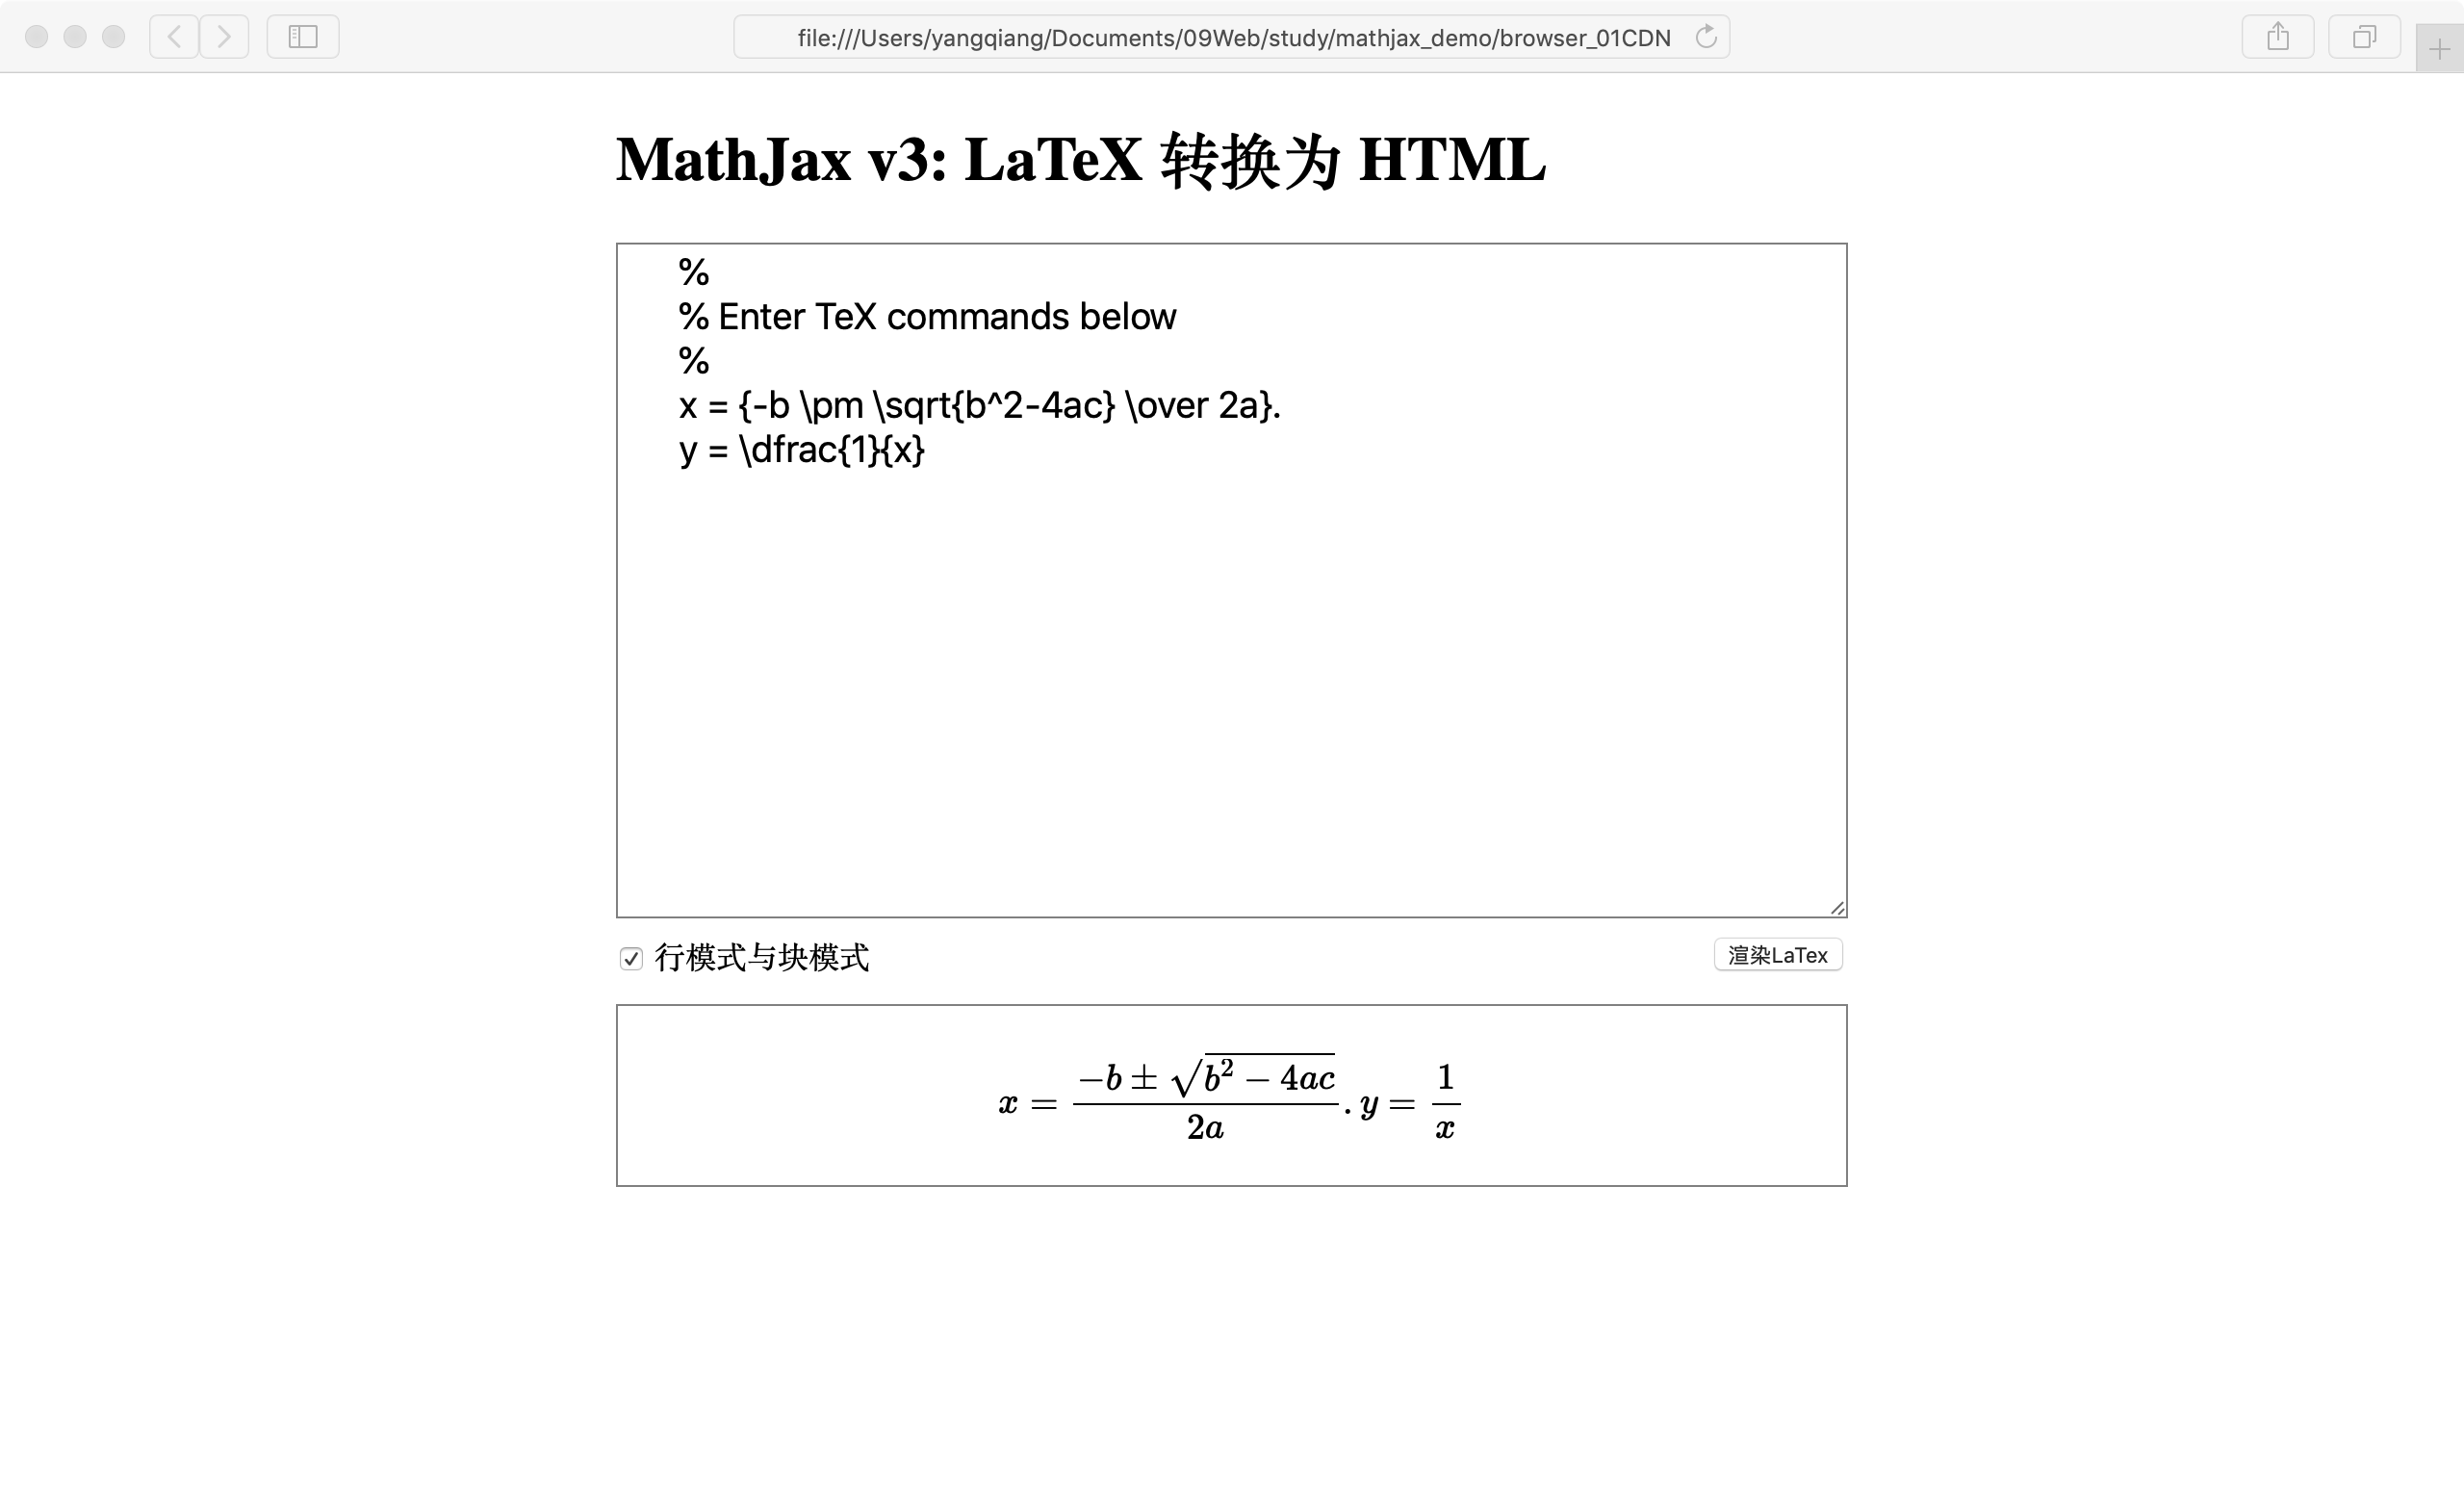

#### 使用本地下载的资源
    - 本地模块，直接用npm下载的node-modules中获取。
    - 除了引入的差异，骐达都是一样的。

```HTML
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>使用MathJax v3转换LaTex为HTML</title>
    <script src="./node_modules//mathjax//es5/tex-chtml.js"></script>
    <script>
```

- **注意**
    - 其中的样式表都使用`<style>`自动添加到HTML的head中.

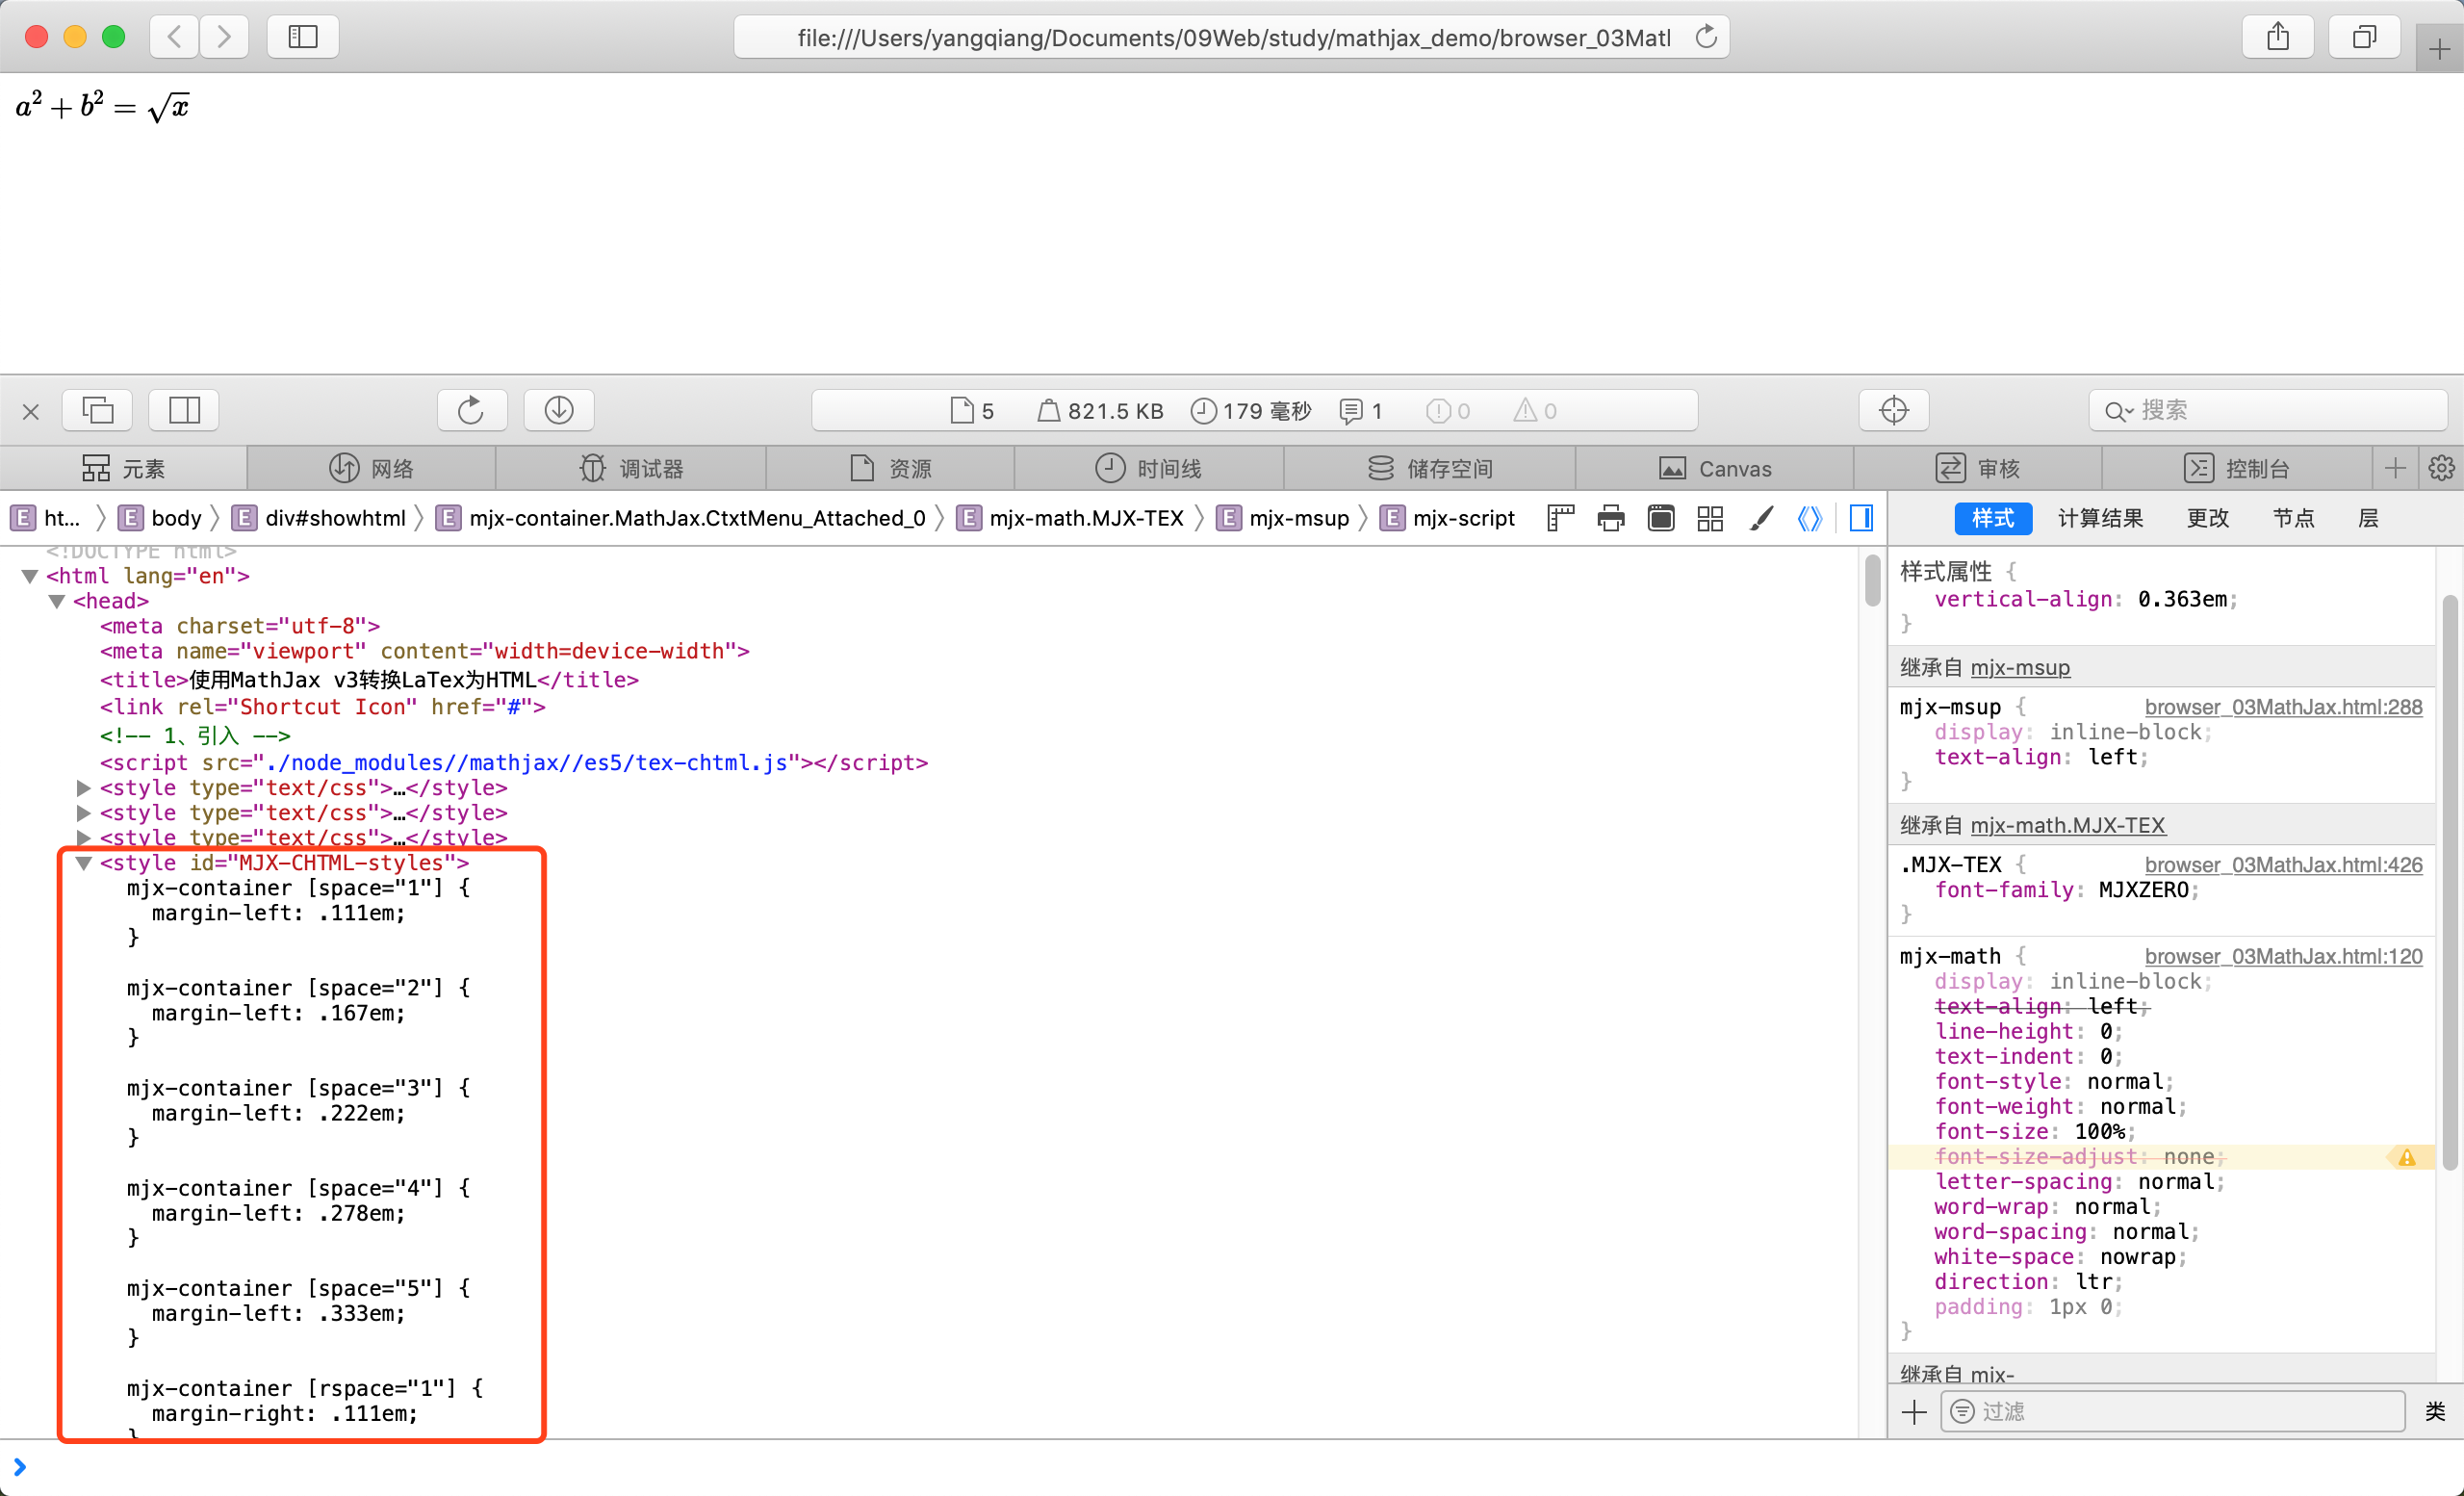

### MathJax全局对象

- MathJax官方的帮助参考文档残缺不全，还没有完全完工，只能通过调试功能观察这些对象。

- MathJax全局对象包含如下成员：
    - 对象
        -  `_: {components: Object, adaptors: Object, core: Object, handlers: Object, mathjax: Object, …}`
        -  `config: {loader: Object, startup: Object, tex: Object, chtml: Object}`
        -  `loader: {ready: function, load: function, preLoad: function, defaultReady: function, getRoot: function}`
        -  `options: {}`
        -  `startup: {constructors: Object, input: Array, output: f, handler: l, adaptor: l, …}`
    - 函数
        -  `chtmlStylesheet: function()`
        -  `getMetricsFor: function(t,e)`
        -  `tex2chtml: function(t,e)`
        -  `tex2chtmlPromise: function(t,e)`
        -  `tex2mml: function(t,e)`
        -  `tex2mmlPromise: function(t,e)`
        -  `texReset: function(t)`
        -  `typeset: function(t)`
        -  `typesetClear: function()`
        -  `typesetPromise: function(t)`
    - 字符串属性
        -  `version: "3.0.0"`

### MathJax得使用步骤

- 当然首先是引入模块
    - `<script src="./node_modules//mathjax//es5/tex-chtml.js"></script>`
- MathJax对象的使用最简单的两步：
    1. 配置选项
    2. 转换LaTex为HTML

#### 配置选项

- 具体的选项后面再详细解释，这儿是基本的选项

```javascript
        var options = {
            em: 19.200000762939453, 
            ex: 8.533333333333333, 
            containerWidth: 626.40625, 
            lineWidth: 1000000, 
            scale: 1.005530377338936,
            display: false,
        };
```

#### 把LaTex转换为HTML

- 这个转换分成同步与异步模式，下面使用的是同步模式：

```javascript
       // 3. 转换LaTex为HTML（同步模式，还有Promise类型的异步模式）
        var input = "a^2 + b^2 = \\sqrt{x}";
        var html = MathJax.tex2chtml(input, options);  // 返回的是DOM对象
        // 日志输出
        console.log(html);
        // 显示到页面（作为节点添加）
        var showhtml = document.getElementById("showhtml");
        showhtml.appendChild(html);
```

- 关于浏览器编程，在了解Node编程方式后，可以获得更多的理解，前后端开发实际以一样的。

# Node.js开发模式

- Node.js得使用是比较麻烦的，因为比起浏览器的使用，更加底层，所以理解略微麻烦点，但定制性更强。

## 模块下载

- 下载步骤：    
    1. 创建目录
    2. 构建npm环境（package.json文件）
    3. 使用npm安装，mathjax-full需要安装`d3@^4.13.0`,所以安装指令如下：
        - `npm install d3@^4.13.0  --save`
        - `npm install mathjax-full --save`

- 关于esm模块
    - 为了支持ES6得语法，在使用node运行的时候，需要预先加载esm模块，执行的时候，需要使用`node -r esm`选项预先加载ems模块。

- MathJax的使用模式有三种：
    - 组件模式；
    - 预加载模式；
    - 直接调用模式；
    
- 说明：
    - 下面按照三种模式分别说明，三种模式本质一样，但是可以注意下三种模式的联系。

## 直接调用模式-高难度

- 直接调用方式就是手工加载需要的模块，并利用各个组件完成转换工作，总体步骤为：
    1. 加载模块
    2. 创建对象
        - 每个对象的构建使用选项设置属性；
    3. 利用各个模块对象，转换输出HTML与CSS（ HTML标记只有与CSS一起使用才能形成最后的公式浏览器输出。）
        - 输出HTML节点对象；
        - 输出CSS样式；

### 需要加载得模块与作用

```javascript
    /*
        1. 加载所有需要的底层模块
    */

    // 负责从Tex到HTML DOM的输出
    const mod_mathjax = require('mathjax-full/js/mathjax.js');      
    // 负责LaTex公式解析  
    const mod_tex = require('mathjax-full/js/input/tex.js');   
    // 负责HTML DOM的创建         
    const mod_chtml = require('mathjax-full/js/output/chtml.js'); 
    // HTML DOM的适配器处理接口         
    const mod_adaptor = require('mathjax-full/js/adaptors/liteAdaptor.js');   
    // 负责注册Adaptor，CHTML模块就调用底层DOM操作完成HTML的创建     
    const mod_htmlhandle = require('mathjax-full/js/handlers/html.js');  
    // Tex需要加载的模块(一个字典)  
const mod_allpackages = require('mathjax-full/js/input/tex/AllPackages.js');
```

### 构建模块对象

```javascript
    /*
        2. 构建模块对象
            |- 选项
            |- 构建
    */

    // 定义HTML的创建接口与适配器
    const adaptor = mod_adaptor.liteAdaptor();
    // 把适配器注册为HTML的DOM处理对象
    mod_htmlhandle.RegisterHTMLHandler(adaptor);
    // -------------------------
    // 定义Tex的输入处理
    var tex_options = {  // 配置相关的子模块
        packages: mod_allpackages.AllPackages,    // 这是一个数组类型的模块列表
    };
    const tex = new mod_tex.TeX(tex_options);
    // -------------------------
    // 定义HTML的输出处理
    var html_options = {
        // 可以设置字库路径等，这儿暂时缺省
    };
    const chtml = new mod_chtml.CHTML(html_options);

    // -------------------------
    // 把tex与chtml对象装配为最后的html与css的文档输出对象
    var document_options = {
        InputJax: tex, 
        OutputJax: chtml
    }
    const document = mod_mathjax.mathjax.document('', document_options);
```

### 生成HTML节点

```javascript
    /*
        3. 输出HTML DOM
    */
    var node_options = {
        em: 19.200000762939453, 
        ex: 8.533333333333333, 
        containerWidth: 626.40625, 
        lineWidth: 1000000, 
        scale: 1.005530377338936,
    };
    const node = document.convert('a^2 + b^2 = x', node_options);
    // 使用适配器生成HTML DOM
    var node_html = adaptor.outerHTML(node);
    console.log(node_html);
```

### 生成CSS样式

```javascript
    /*
        4. 输出CSS样式表
    */
    // 样式表与Tex没有关系，可以使用chtml直接获取
    var css = chtml.styleSheet(document);
    //转换为文本
    var css_html = adaptor.textContent(css);  
    console.log(css_html);

```

### 完整代码清单

```javascript
    /*
        1. 加载所有需要的底层模块
    */

    // 负责从Tex到HTML DOM的输出
    const mod_mathjax = require('mathjax-full/js/mathjax.js');      
    // 负责LaTex公式解析  
    const mod_tex = require('mathjax-full/js/input/tex.js');   
    // 负责HTML DOM的创建         
    const mod_chtml = require('mathjax-full/js/output/chtml.js'); 
    // HTML DOM的适配器处理接口         
    const mod_adaptor = require('mathjax-full/js/adaptors/liteAdaptor.js');   
    // 负责注册Adaptor，CHTML模块就调用底层DOM操作完成HTML的创建     
    const mod_htmlhandle = require('mathjax-full/js/handlers/html.js');  
    // Tex需要加载的模块(一个字典)  
    const mod_allpackages = require('mathjax-full/js/input/tex/AllPackages.js');

    /*
        2. 构建模块对象
            |- 选项
            |- 构建
    */

    // 定义HTML的创建接口与适配器
    const adaptor = mod_adaptor.liteAdaptor();
    // 把适配器注册为HTML的DOM处理对象
    mod_htmlhandle.RegisterHTMLHandler(adaptor);
    // -------------------------
    // 定义Tex的输入处理
    var tex_options = {  // 配置相关的子模块
        packages: mod_allpackages.AllPackages,    // 这是一个数组类型的模块列表
    };
    const tex = new mod_tex.TeX(tex_options);
    // -------------------------
    // 定义HTML的输出处理
    var html_options = {
        // 可以设置字库路径等，这儿暂时缺省
    };
    const chtml = new mod_chtml.CHTML(html_options);

    // -------------------------
    // 把tex与chtml对象装配为最后的html与css的文档输出对象
    var document_options = {
        InputJax: tex, 
        OutputJax: chtml
    }
    const document = mod_mathjax.mathjax.document('', document_options);
    /*
        3. 输出HTML DOM
    */
    var node_options = {
        em: 19.200000762939453, 
        ex: 8.533333333333333, 
        containerWidth: 626.40625, 
        lineWidth: 1000000, 
        scale: 1.005530377338936,
    };
    const node = document.convert('a^2 + b^2 = x', node_options);
    // 使用适配器生成HTML DOM
    var node_html = adaptor.outerHTML(node);
    console.log(node_html);
    /*
        4. 输出CSS样式表
    */
    // 样式表与Tex没有关系，可以使用chtml直接获取
    var css = chtml.styleSheet(document);
    //转换为文本
    var css_html = adaptor.textContent(css);  
    console.log(css_html);

```

### API说明

- 这些API的官方文档还在构建中，不过使用模式比较简单，重点是：
    - **输入**与**输出**，比较常用的方式是：（当然还有其他转换）
        - 输入：Tex
        - 输出：CHTML
    - **输入与输出的选项**
        - 每个对象的选项都有固定的key，大部分情况下可以使用默认值。

## 预加载模式-中难度

- 预加载模式的编程步骤是：
    1. 描述加载前的参数；
    2. 加载模块；
    3. 设置Tex需要的已经加载的模块； 
    4. 初始化调用input与output的封装适配器；
    5. 转换Tex为DOM；
    6. 把DOM转换为CSS；
    7. 把DOM转换为HTML；
    

### 描述加载前的参数

- 这种编程方式关键是理解加载前参数设计与加载的关系
    - 因为很多功能结构都是在加载的时候动态产生的，没有这些参数描述，某些对象或者对象的函数与属性就不存在，也就无法访问。指导接口是动态产生的，就明白为什么要先设置参数，然后再加载；而不是加载后再设置参数。

```javascript
    /*
        1. 配置MathJax；
    */
    MathJax = {
        tex: {                  // 指定输入Tex需要的参数
            packages: [        // |- 指定Tex需要加载的模块；
                'base', 'autoload', 'require', 'ams', 'newcommand',
            ],
        },
        chtml: {                // 指定输出chtml需要的参数；

        },
        startup: {              // 指定开始转换需要的参数；
            typeset: false,     
        }
    };

```

- 上面的参数如果不设置的话，就全部采用默认设置；
    - MathJax是固定的参数；

### 加载模块

- 注意加载的模块都是组件目录的src下的模块；

```javascript

    /*
        2. 加载需要的模块；
            |- 注意：加载的是src下的模块
            |- 注意：MathJax需要先定义，在下面require的时候会根据参数产生loader中的preLoad函数
     */
    require('mathjax-full/components/src/startup/lib/startup.js');
    require('mathjax-full/components/src/core/core.js');
    require('mathjax-full/components/src/adaptors/liteDOM/liteDOM.js');
    require('mathjax-full/components/src/input/tex-base/tex-base.js');
    require('mathjax-full/components/src/input/tex/extensions/all-packages/all-packages.js');
    require('mathjax-full/components/src/output/chtml/chtml.js');
    require('mathjax-full/components/src/output/chtml/fonts/tex/tex.js');
    require('mathjax-full/components/src/startup/startup.js');

```

### 设置Tex需要的已经加载的模块

- 后面会利用这些已经加载的模块完成核心功能接口的初始化；

```javascript
    /*
        3. 告诉MathJax,已经预加载的模块
    */
    MathJax.loader.preLoad(
        'core',
        'adaptors/liteDOM',
        'input/tex-base',
        '[tex]/all-packages',
        'output/chtml',
        'output/chtml/fonts/tex'
    );

```

### 初始化调用input与output的封装适配器

- 完成初始化后，获取的adaptor接口就可以工作，因为访问结构与功能已经动态产生；

```javascript
    /*
        4. 初始化调用input与output的封装适配器
            | - adaptor
    */
    MathJax.config.startup.ready();
    const adaptor = MathJax.startup.adaptor;

```

### 转换Tex为DOM

- 因为前面的工作，所以才能调用MathJax对象的tex2chtml函数来完成Tex到HTML转换工作。

```javascript
    /*
        5. 转换LaTex为DOM
    */
    const options = {
        em: 19.200000762939453, 
        ex: 8.533333333333333, 
        containerWidth: 626.40625, 
        lineWidth: 1000000, 
        scale: 1.005530377338936,
    }

    const node_html = MathJax.tex2chtml('a^2 + b^2 = x', options)
    const node_css = MathJax.chtmlStylesheet()

```

### 把DOM转换为CSS

- 剩下的只是转换为在HTML中能够使用的字符串，而不是Javascript中使用的对象。

```javascript
    /*
        6. 转换为CSS
            | - 这个实际是与Tex无关的，样式对所有Tex都是一样
    */
    const css = adaptor.textContent(node_css);
    console.log(css);

```

### 把DOM转换为HTML

```javascript
    /*
        7. 转换为HTML
    */
    const html = adaptor.outerHTML(node_html);
    console.log(html);

```

### 执行的注意事项

- 这个程序需要在执行的时候，预先加载esm模块，用开解决ES6语法的支持。
    - `node -r esm node_02preload.js`

## 组件模式-低难度

- 组件模式其实就是所有的操作都封装成一个面向用户调用的接口对象，直接配置、使用这个对象即可，编程步骤是：
    1. 确定编程框架；
    2. 配置转换需要的选项
        1. 配置loader；
        2. 配置tex（可以默认）；
        3. 配置chtml（可以默认）；
        4. 配置startup；
    3. 加载startup模块；
    4. 转换Tex为HTML与CSS
        - 这个与前面一样的。

### 编程框架

- 下面这种语法风格，需要预先加载esm模块才能对其中的某些产生效果；

```javascript
    MathJax = {
        // 模块加载
        loader: {

        },
        // 输入Tex的参数，包含说明已经加载可以使用的模块；
        tex: {

        },
        // 输出CHTML的参数，包含CSS使用的字体库的URL
        chtml: {

        },

        // 转换需要的参数
        startup: {

        },

    };

```

### 配置转换需要的选项

```javascript

    MathJax = {
        // 模块加载
        loader: {
            paths: {mathjax: 'mathjax-full/es5'},
            require: require,                           // 加载方式
            load: ['input/tex-full', 'output/chtml', 'adaptors/liteDOM'],
        },
        // 输入Tex的参数，包含说明已经加载可以使用的模块；
        tex: {
            packages: ['base', 'autoload', 'require', 'ams', 'newcommand',],
        },
        // 输出CHTML的参数，包含CSS使用的字体库的URL
        chtml: {
            // 使用默认的参数
        },

        // 转换需要的参数
        startup: {
            typeset: false,
            pageReady: () => {   // 使用箭头函数
                console.log('开始转换');
            },
        },

    };
```

### 加载startup模块

```javascript

    // 加载startup模块（如果上面没有配置号，这个加载会失败【抛出异常】）
    require('mathjax-full/es5/startup.js');
    // 执行命令：node -r esm node_03componenet.js

```

- 现在可以运行了
    - `node node_03componenet.js`

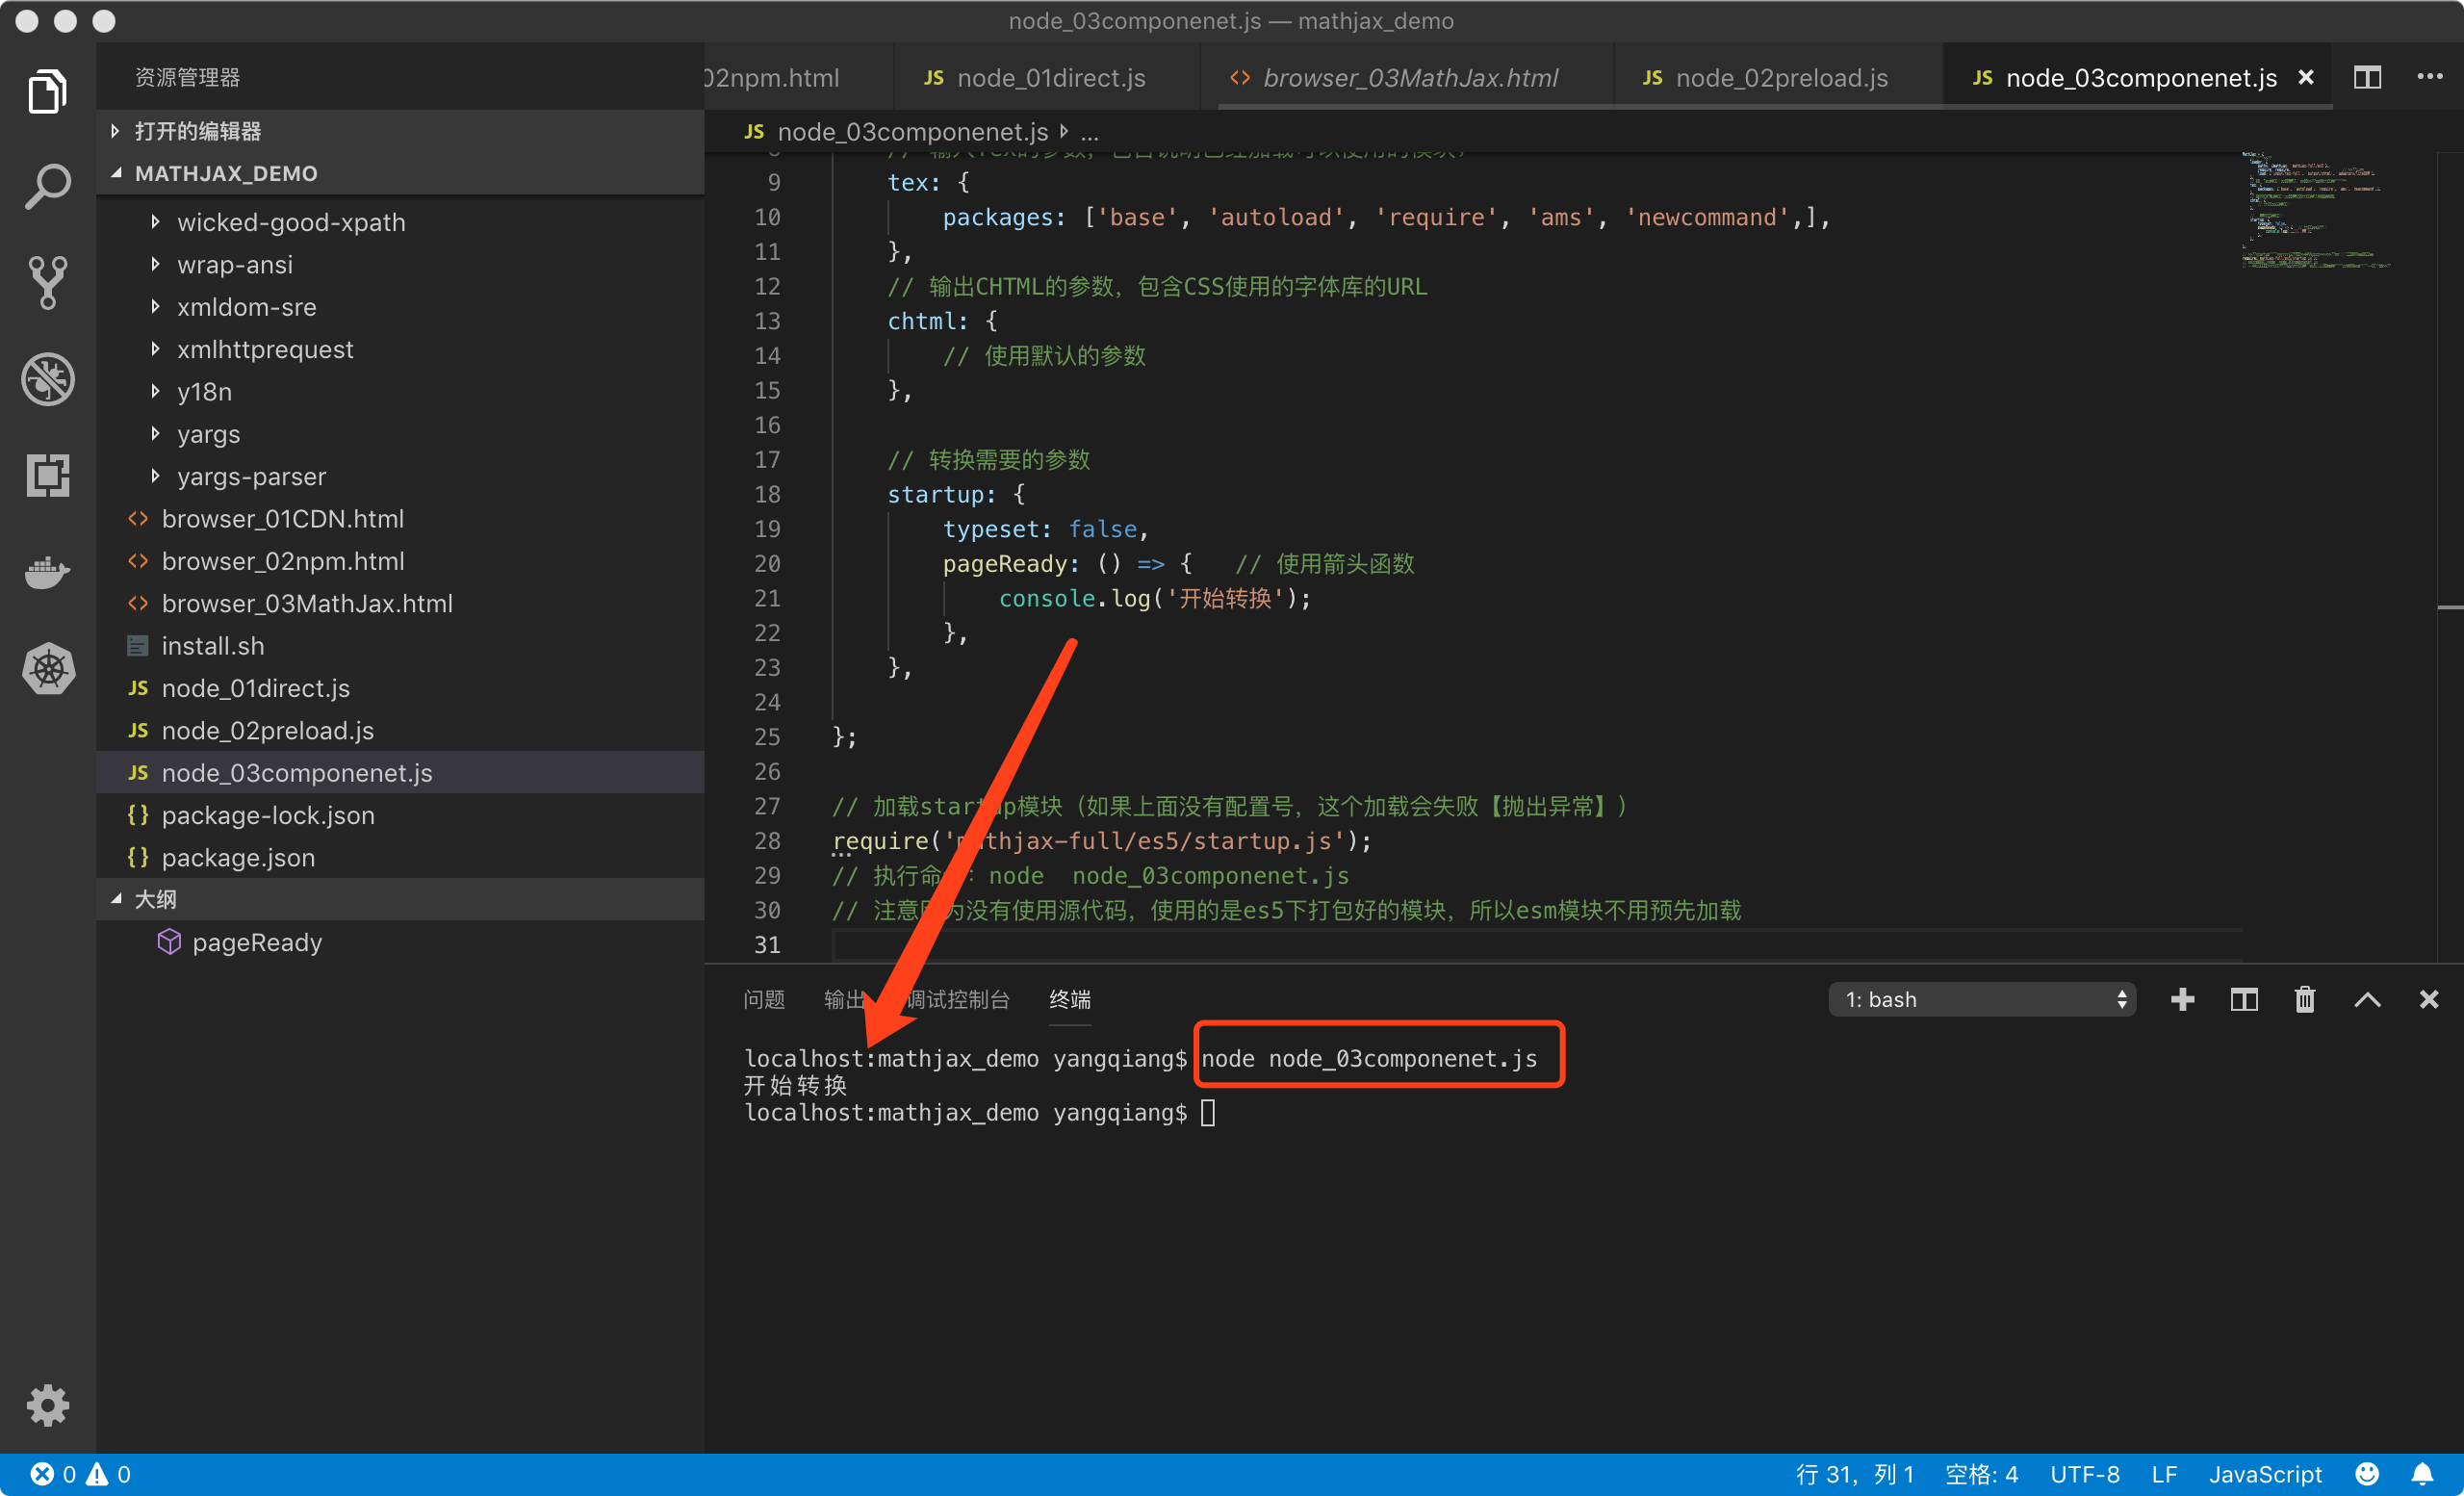

### 转换Tex为HTML与CSS

- **注意：**
    - 这里可以使用两种方式实现，同步与异步模式

####  同步模式

```javascript
            // console.log('开始转换');
            const options = {
                em: 19.200000762939453, 
                ex: 8.533333333333333, 
                containerWidth: 626.40625, 
                lineWidth: 1000000, 
                scale: 1.005530377338936,
            }
            const node_html = MathJax.tex2chtml('a^2 + b^2 = x', options);
            const adaptor = MathJax.startup.adaptor;
            
            const node_css = MathJax.chtmlStylesheet();
            const css = adaptor.textContent(node_css);
            console.log(css);
            const html = adaptor.outerHTML(node_html);
            console.log(html);
```

#### 异步模式

```javascript
            // 异步模式
            const promise = MathJax.tex2chtmlPromise('a^2 + b^2 = x', options);
            promise.then(
                (node_html) => {
                    const adaptor = MathJax.startup.adaptor;
                    const html = adaptor.outerHTML(node_html);
                    console.log(html);   
                    // 这个实际上可以在外面调用，不依赖node_html
                    const node_css = MathJax.chtmlStylesheet();
                    const css = adaptor.textContent(node_css);  
                    console.log(css);
                },
            ).catch(
                (err) => {
                    console.log(err);
                }
            );
```

- 异步模式的结构比较简单

```javascript
            promise.then( 业务处理回调函数 ).catch( 异常处理回调函数 );
```

### 完整代码

```javascript

MathJax = {
    // 模块加载
    loader: {
        paths: {mathjax: 'mathjax-full/es5'},
        require: require,                           // 加载方式
        load: ['input/tex-full', 'output/chtml', 'adaptors/liteDOM'],
    },
    // 输入Tex的参数，包含说明已经加载可以使用的模块；
    tex: {
        packages: ['base', 'autoload', 'require', 'ams', 'newcommand',],
    },
    // 输出CHTML的参数，包含CSS使用的字体库的URL
    chtml: {
        // 使用默认的参数
    },

    // 转换需要的参数
    startup: {
        typeset: false,
        pageReady: () => {   // 使用箭头函数
            // console.log('开始转换');
            const options = {
                em: 19.200000762939453, 
                ex: 8.533333333333333, 
                containerWidth: 626.40625, 
                lineWidth: 1000000, 
                scale: 1.005530377338936,
            }
            // 同步模式
            // const node_html = MathJax.tex2chtml('a^2 + b^2 = x', options);
            // const adaptor = MathJax.startup.adaptor;

            // const node_css = MathJax.chtmlStylesheet();
            // const css = adaptor.textContent(node_css);
            // console.log(css);
            // const html = adaptor.outerHTML(node_html);
            // console.log(html);

            // 异步模式
            const promise = MathJax.tex2chtmlPromise('a^2 + b^2 = x', options);
            promise.then(
                (node_html) => {
                    const adaptor = MathJax.startup.adaptor;
                    const html = adaptor.outerHTML(node_html);
                    console.log(html);   
                    // 这个实际上可以在外面调用，不依赖node_html
                    const node_css = MathJax.chtmlStylesheet();
                    const css = adaptor.textContent(node_css);  
                    console.log(css);
                },
            ).catch(
                (err) => {
                    console.log(err);
                }
            );

        },
    },

};

// 加载startup模块（如果上面没有配置号，这个加载会失败【抛出异常】）
require('mathjax-full/es5/startup.js');

// 源代码方式（记得用-r esm选项）
// require('mathjax-full/components/src/startup/startup.js');

// 执行命令：node  node_03componenet.js   
// 注意:因为没有使用源代码，使用的是es5下打包好的模块，所以esm模块不用预先加载


```

- 执行结果截图

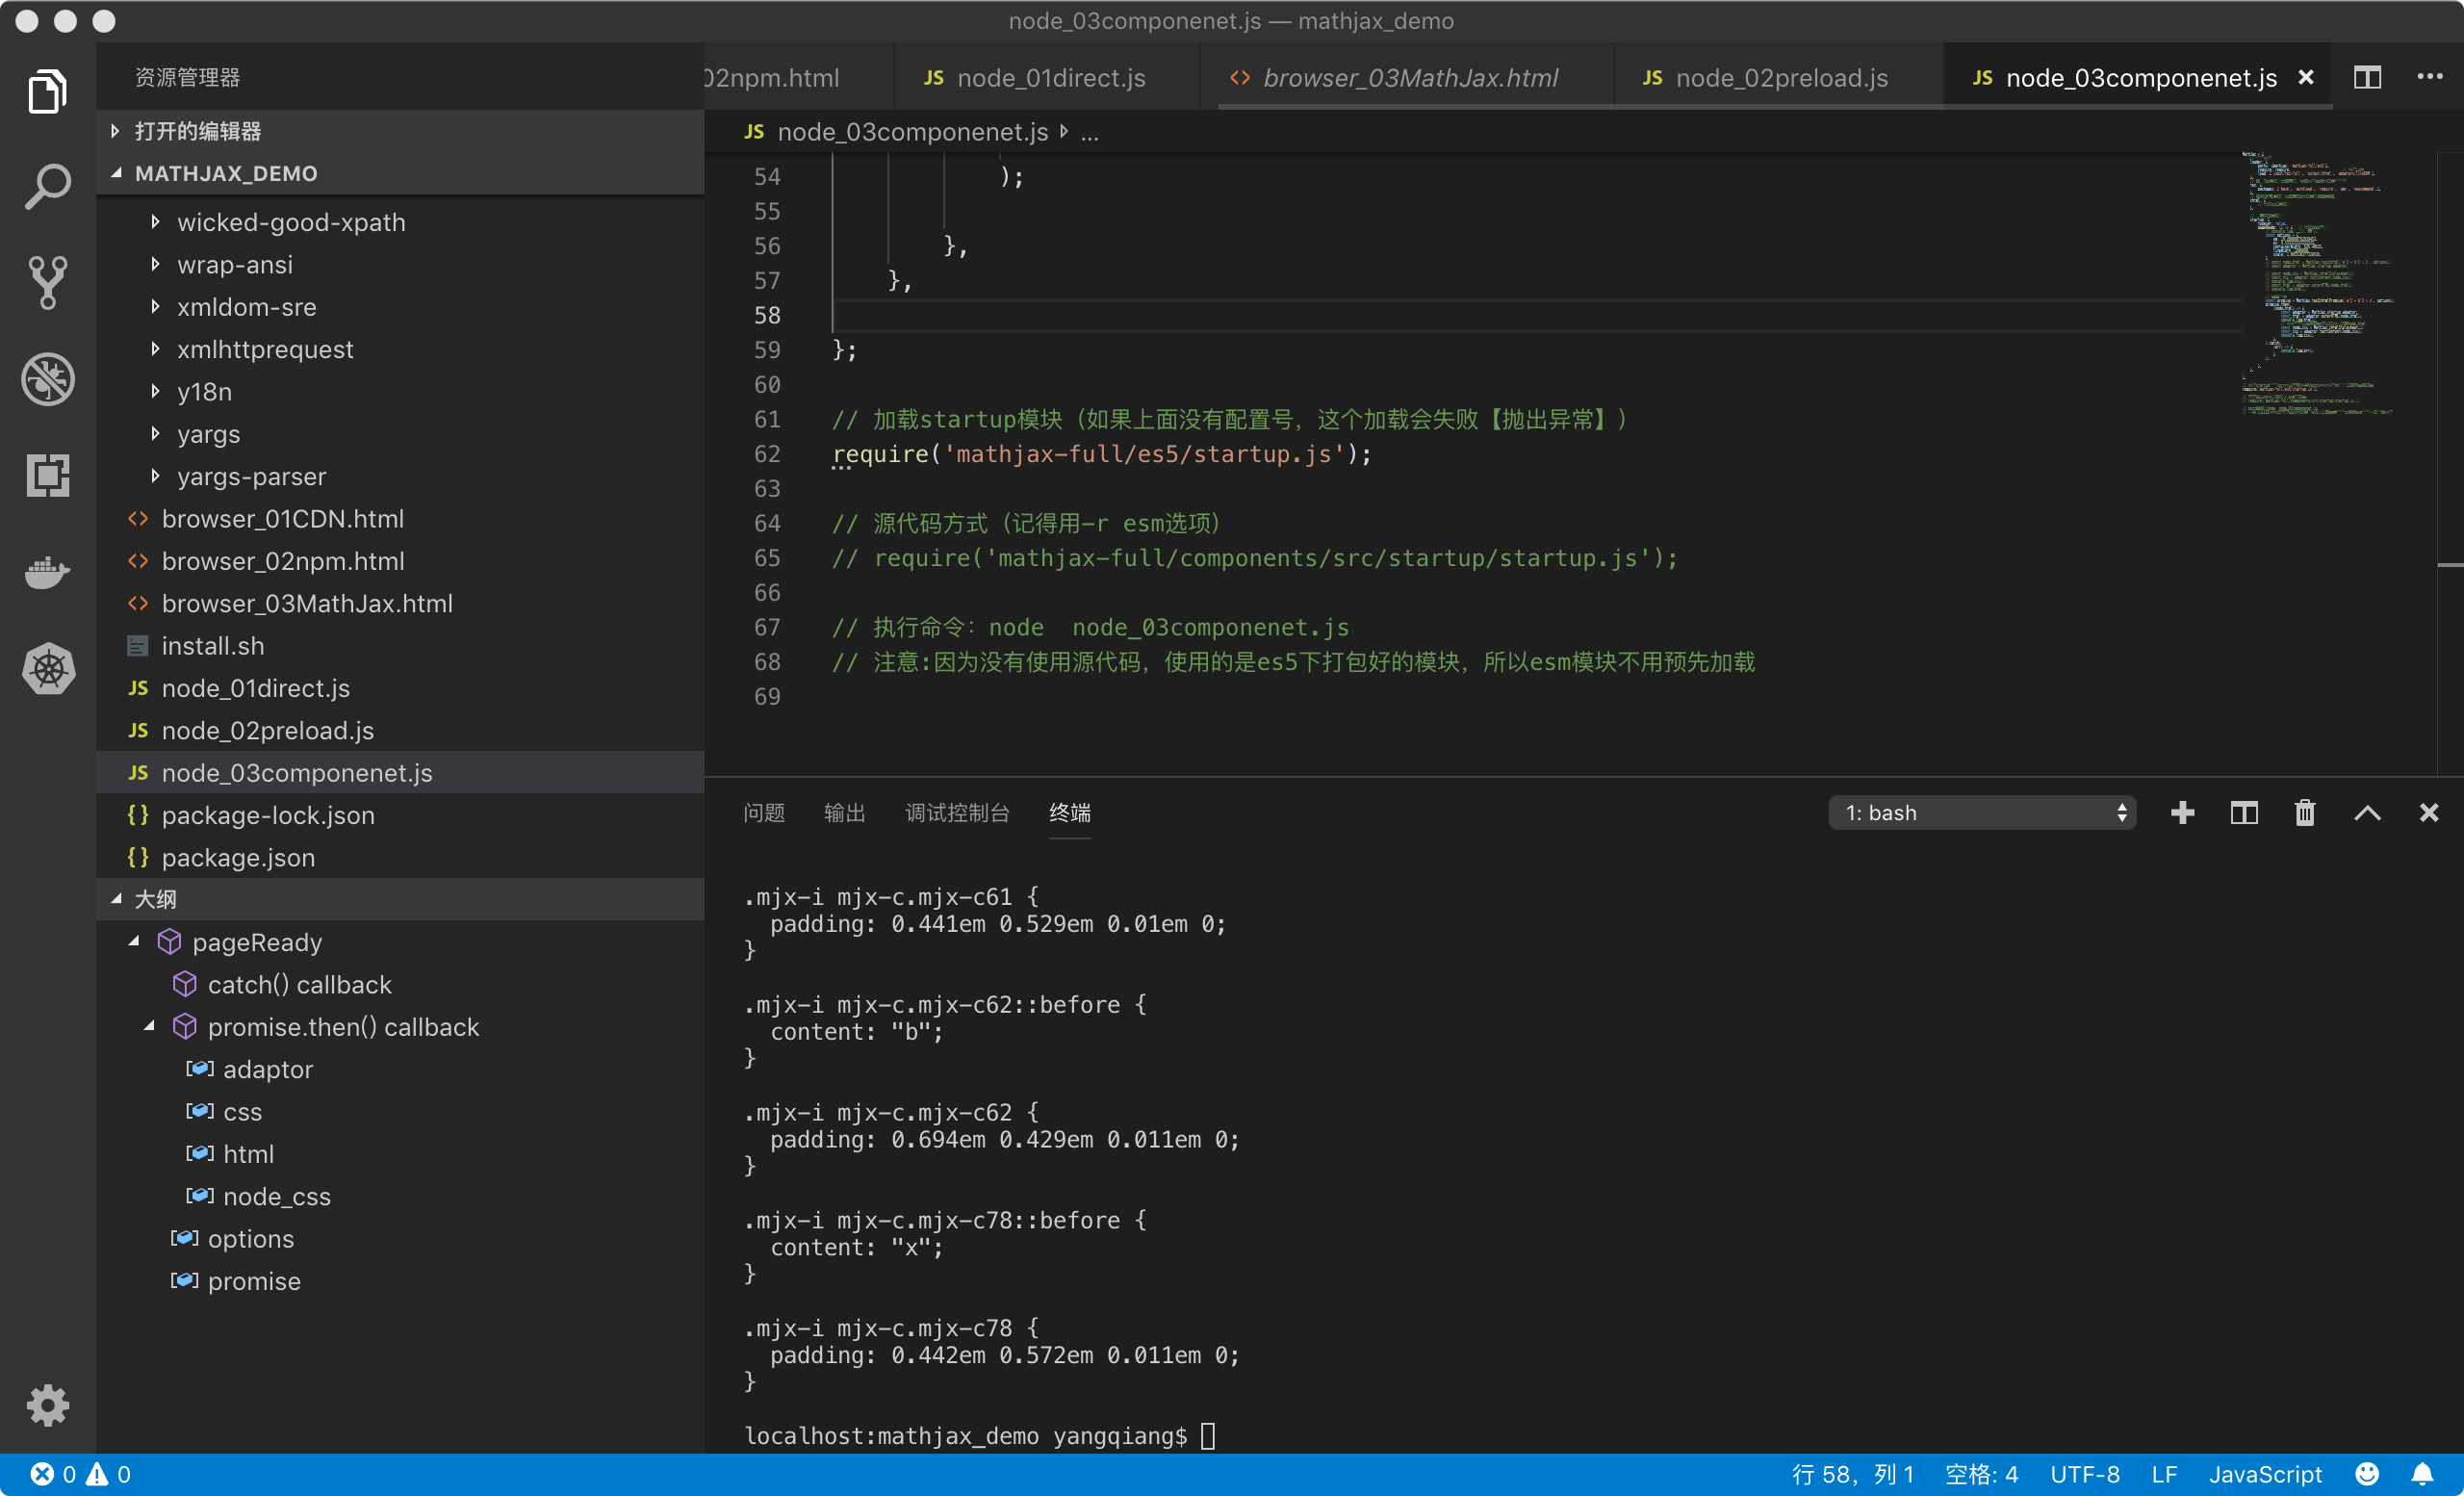

----

# 总结

- 上述三种编程方式一样，理解以后实际使用哪一种都无所谓。关键理解清除MathJax处理的整体架构；如果要选择的话：
    1. 还是第一种最像传统编程方式，依赖对象完成业务功能。
    2. 第二种隐藏部分细节，描述的内容还是一样，不容易理解；
    3. 第三种完全隐藏细节，只是暴露配置信息，如果理解了工作原理，最后一种是最佳选择（简洁清楚，结构化）；
    
- 我喜欢第一种😂😂😂😂。

----